In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

# Task 1

In [66]:
profs = pd.read_csv('app_installs_processed.csv')[['username','day_reg','lang','country']]
logs = pd.read_csv('logins_processed (2).csv')[['username','login_dt']]
pays=pd.read_csv('payments_processed.csv')[['username','pay_dt',	'pay_amt','currency']]
logs=logs.drop_duplicates()
logs.head(5)

,username,login_dt
0,richarddavid,2022-06-22 00:00:00
1,richarddavid,2022-04-05 00:00:00
4,richarddavid,2022-06-14 00:00:00
5,richarddavid,2022-05-06 00:00:00
6,richarddavid,2022-06-07 00:00:00


In [67]:
print(profs.shape)
print(logs.shape)
print(profs['username'].unique().shape)
print(logs['username'].unique().shape)


(16999, 4)
(327475, 2)
(16367,)
(16367,)


In [68]:
profs.info()
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16999 entries, 0 to 16998
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  16999 non-null  object
 1   day_reg   16999 non-null  object
 2   lang      16999 non-null  object
 3   country   16999 non-null  object
dtypes: object(4)
memory usage: 531.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 327475 entries, 0 to 1031796
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   username  327475 non-null  object
 1   login_dt  326968 non-null  object
dtypes: object(2)
memory usage: 7.5+ MB


In [69]:
# Убираем все дублирующиеся логины (если две строки с логином - убираем все обе)
#https://kanokidotorg.github.io/pandas-drop-rows-with-conditions-with-conditions-in-list-and-with-Index-and-rows-having-NaN-values
prof_grp=profs.copy()
prof_grp['cnt']=1
pg=prof_grp.groupby(['username'])['cnt'].sum()
pg=pg.to_frame().reset_index()
print(pg[pg['cnt']==1].count())
pg_lst=pg[pg['cnt']==1]['username'].to_list()
len(pg_lst)

username    15777
cnt         15777
dtype: int64


15777

In [70]:
profs_clear=profs.loc[profs['username'].isin(pg_lst)]
profs_clear.shape

(15777, 4)

In [71]:
profs_cl_country1=profs_clear.loc[profs_clear['country']=='country1']
profs_cl_country1.shape
profs_clear['cnt']=1
pd.pivot_table(profs_clear,
                index='country',
                columns='lang',
                values='cnt',
                aggfunc=np.sum)

lang,lang1,lang2
country,,
country1,1698.0,NaN
country2,3403.0,6438.0
country3,4238.0,NaN


In [72]:
# https://realpython.com/pandas-groupby/
#logs_evrd=logs[['username', 'login_dt']]
#logs_evrd['login_dt_evrd']=pd.to_datetime(logs_evrd['login_dt'])
#logs2=logs_evrd.groupby(['username','login_dt'])['login_dt_evrd'].min()
#logs2=logs2.to_frame().reset_index()
#logs2.head(2)

In [73]:
#https://www.codecamp.ru/blog/left-join-pandas/
# Шаг 1. Связываем регистрацию и логины
reten=pd.merge(profs_clear,logs, on='username', how='outer') #(327475, 6)

#reten=pd.merge(profs_clear,logs, on='username', how='left') #(304575, 6)
#reten=pd.merge(profs_clear,logs, on='username', how='left')
print(reten.shape)
reten.columns

(327475, 6)


Index(['username', 'day_reg', 'lang', 'country', 'cnt', 'login_dt'], dtype='object')

In [74]:
day_reg_null=reten.loc[reten['day_reg'].isnull()]
day_reg_null

,username,day_reg,lang,country,cnt,login_dt
304575,dennis00,NaN,NaN,NaN,NaN,2023-05-17 00:00:00
304576,dennis00,NaN,NaN,NaN,NaN,2023-04-27 00:00:00
304577,dennis00,NaN,NaN,NaN,NaN,2023-06-22 00:00:00
304578,dennis00,NaN,NaN,NaN,NaN,2023-05-26 00:00:00
304579,dennis00,NaN,NaN,NaN,NaN,2023-04-18 00:00:00
...,...,...,...,...,...,...
327470,hmccoy,NaN,NaN,NaN,NaN,2022-06-28 00:00:00
327471,hmccoy,NaN,NaN,NaN,NaN,2022-07-02 00:00:00
327472,ltucker,NaN,NaN,NaN,NaN,2023-03-03 00:00:00
327473,ltucker,NaN,NaN,NaN,NaN,2023-04-14 00:00:00


In [75]:
# https://www.codecamp.ru/blog/convert-columns-to-datetime-pandas/
# https://habr.com/ru/companies/wunderfund/articles/677068/
#logs_grp=logs[['username', 'login_ts']]
#logs_grp['y']=pd.to_datetime(logs_grp['login_ts'])

#logs_grp.head()
#ls=logs_grp.groupby(['username'])['y'].min()

In [76]:
# Шаг 2. Приводим даты к нужному формату и чистим дубли

reten_c2=reten.loc[reten['country']=='country2']

print(reten_c2.shape) #(198176, 6)
print(reten_c2['login_dt'].isnull().sum()) # 273
reten_c2.info()

# если пользователь зарегистрировался, ни ни разу не входил - ставим в login_dt=day_reg
#reten_c2_add=reten_c2.loc[reten_c2['login_dt'].isnull()]
#reten_c2_add['login_dt']=reten_c2_add['day_reg']

#print(reten_c2_add.shape) # (273, 6)
#reten_c2_ext=reten_c2.copy()
#reten_c2_ext=reten_c2_ext.append(reten_c2_add)
#print(reten_c2_ext.shape) #(198449, 6)
#print('---')
#r=reten_c2_ext.loc[reten_c2_ext['day_reg'].isnull()]
#print(reten_c2_ext.loc[reten_c2_ext['login_dt'].isnull()].shape)
#reten_c2_ext

(198176, 6)
273
<class 'pandas.core.frame.DataFrame'>
Int64Index: 198176 entries, 0 to 304574
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   username  198176 non-null  object 
 1   day_reg   198176 non-null  object 
 2   lang      198176 non-null  object 
 3   country   198176 non-null  object 
 4   cnt       198176 non-null  float64
 5   login_dt  197903 non-null  object 
dtypes: float64(1), object(5)
memory usage: 10.6+ MB


In [77]:
# если пользователь зарегистрировался, ни ни разу не входил - ставим в login_dt=day_reg
reten_c2_rpl=reten_c2.copy()
#for ind in reten_c2_ext.loc[reten_c2_ext['login_dt'].isnull()].index:
i=0
for ind in reten_c2_rpl.loc[reten_c2_rpl['login_dt'].isnull()].index:
    #print(reten_c2_rpl['day_reg'][ind], reten_c2_rpl['login_dt'][ind])
    reten_c2_rpl['login_dt'][ind]=reten_c2_rpl['day_reg'][ind]
    i=i+1
print(i)
print(reten_c2_rpl.loc[reten_c2_rpl['login_dt'].isnull()].shape)
reten_c2_rpl.info()

273
(0, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 198176 entries, 0 to 304574
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   username  198176 non-null  object 
 1   day_reg   198176 non-null  object 
 2   lang      198176 non-null  object 
 3   country   198176 non-null  object 
 4   cnt       198176 non-null  float64
 5   login_dt  198176 non-null  object 
dtypes: float64(1), object(5)
memory usage: 14.6+ MB


In [78]:
reten_c2_rpl['register_date']=pd.to_datetime(reten_c2_rpl['day_reg'])
reten_c2_rpl['login_date']   =pd.to_datetime(reten_c2_rpl['login_dt'])

#reten_c2_ext['reg_month']=reten_c2_ext['register_date'].dt.month

#https://stackoverflow.com/questions/65048547/how-to-get-number-of-days-between-two-dates-using-pandas
reten_c2_rpl['day_n']=(reten_c2_rpl['login_date']-reten_c2_rpl['register_date']).dt.days
print(reten_c2_rpl[reten_c2_rpl['day_n']<0])

print(reten_c2_rpl.shape)
#reten_c2_ext.nunique()

Empty DataFrame
Columns: [username, day_reg, lang, country, cnt, login_dt, register_date, login_date, day_n]
Index: []
(198176, 9)


In [79]:
# https://www.codecamp.ru/blog/pandas-unique-rows/
reten_c2_ext=reten_c2_rpl.copy()
print(reten_c2_ext.shape)
print(len((reten_c2_ext['username'])))
print('---')
print(len((reten_c2_ext.loc[reten_c2_ext['day_n']==0]['username'])))
print(len(set(reten_c2_ext.loc[reten_c2_ext['day_n']==0]['username'])))
print('---')
s1=set(reten_c2_ext['username'])
s2=set(reten_c2_ext.loc[reten_c2_ext['day_n']==0]['username'])
s=(s1-s2)
print(len(s))

(198176, 9)
198176
---
9050
9050
---
791


In [80]:
reten_c2_ext.loc[reten_c2_ext['username'].isin(s)].loc[reten_c2_ext['day_n']==0]

,username,day_reg,lang,country,cnt,login_dt,register_date,login_date,day_n


In [81]:
reten_c2_ext.loc[reten_c2_ext['username'].isin(s)]

,username,day_reg,lang,country,cnt,login_dt,register_date,login_date,day_n
3418,scottjason,2022-06-25,lang1,country2,1.0,2022-12-20 00:00:00,2022-06-25,2022-12-20,178
3419,scottjason,2022-06-25,lang1,country2,1.0,2022-07-08 00:00:00,2022-06-25,2022-07-08,13
3420,scottjason,2022-06-25,lang1,country2,1.0,2022-11-25 00:00:00,2022-06-25,2022-11-25,153
3421,scottjason,2022-06-25,lang1,country2,1.0,2022-12-19 00:00:00,2022-06-25,2022-12-19,177
3422,scottjason,2022-06-25,lang1,country2,1.0,2022-12-22 00:00:00,2022-06-25,2022-12-22,180
...,...,...,...,...,...,...,...,...,...
304306,nicholas77,2022-12-09,lang2,country2,1.0,2022-12-21 00:00:00,2022-12-09,2022-12-21,12
304307,nicholas77,2022-12-09,lang2,country2,1.0,2022-12-30 00:00:00,2022-12-09,2022-12-30,21
304308,nicholas77,2022-12-09,lang2,country2,1.0,2022-12-12 00:00:00,2022-12-09,2022-12-12,3
304511,denise81,2023-04-17,lang2,country2,1.0,2023-04-18 00:00:00,2023-04-17,2023-04-18,1


In [82]:
reten_c2_add=reten_c2_ext.copy()
reten_c2_add=reten_c2_add.loc[reten_c2_ext['username'].isin(s)]
reten_c2_add.columns
#['username', 'day_reg', 'lang', 'country', 'cnt', 'login_dt', 'register_date', 'login_date', 'day_n']
reten_c2_add['login_dt']=reten_c2_add['register_date']
reten_c2_add['login_date']=reten_c2_add['register_date']
reten_c2_add['day_n']=0
# https://www.codecamp.ru/blog/pandas-unique-rows/
reten_c2_add=reten_c2_add.drop_duplicates()
reten_c2_add

,username,day_reg,lang,country,cnt,login_dt,register_date,login_date,day_n
3418,scottjason,2022-06-25,lang1,country2,1.0,2022-06-25,2022-06-25,2022-06-25,0
3435,david17,2022-07-22,lang1,country2,1.0,2022-07-22,2022-07-22,2022-07-22,0
4498,andrew14,2022-12-22,lang2,country2,1.0,2022-12-22,2022-12-22,2022-12-22,0
6494,catherinebrock,2022-07-01,lang1,country2,1.0,2022-07-01,2022-07-01,2022-07-01,0
7637,elizabethperez,2022-07-23,lang1,country2,1.0,2022-07-23,2022-07-23,2022-07-23,0
...,...,...,...,...,...,...,...,...,...
304181,murphycharles,2023-05-20,lang2,country2,1.0,2023-05-20,2023-05-20,2023-05-20,0
304215,leoncody,2022-07-14,lang1,country2,1.0,2022-07-14,2022-07-14,2022-07-14,0
304288,bryantbobby,2023-03-11,lang2,country2,1.0,2023-03-11,2023-03-11,2023-03-11,0
304292,nicholas77,2022-12-09,lang2,country2,1.0,2022-12-09,2022-12-09,2022-12-09,0


In [83]:
reten_c2_ext2=reten_c2_ext.copy()
reten_c2_ext2=reten_c2_ext2.append(reten_c2_add)
reten_c2_ext2.shape

(198967, 9)

In [84]:
print(reten_c2_ext2['login_date'].max())
newDate = reten_c2_ext2['login_date'].max() - pd.Timedelta("30 days")
pd.to_datetime(newDate)

2023-06-26 00:00:00


Timestamp('2023-05-27 00:00:00')

In [85]:
reten_c2_ext_dt=reten_c2_ext2.copy()
reten_c2_ext_dt=reten_c2_ext_dt.loc[reten_c2_ext_dt['register_date']<=pd.to_datetime(newDate)]
print(reten_c2_ext_dt.shape)

username=reten_c2_ext_dt['username'].to_list()
print(len(set(username))) #9349=3403+5946

# уникальные пользователи
lang1_usrs=len(set(reten_c2_ext_dt.loc[reten_c2_ext_dt['lang']=='lang1']['username']))
lang2_usrs=len(set(reten_c2_ext_dt.loc[reten_c2_ext_dt['lang']=='lang2']['username']))
print(lang1_usrs)
print(lang2_usrs)

(196307, 9)
9349
3403
5946


In [86]:
reten_c2_ext_dt2=reten_c2_ext_dt.loc[reten_c2_ext_dt['day_n']<=30]
print(reten_c2_ext_dt2.shape)
# уникальные пользователи
print(len(set(reten_c2_ext_dt2['username'])))
print(len(set(reten_c2_ext_dt2.loc[reten_c2_ext_dt2['lang']=='lang1']['username'])))
print(len(set(reten_c2_ext_dt2.loc[reten_c2_ext_dt2['lang']=='lang2']['username'])))
print('---')
print(len(set(reten_c2_ext_dt2.loc[reten_c2_ext_dt2['day_n']==0]['username'])))
print(len(set(reten_c2_ext_dt2.loc[(reten_c2_ext_dt2['day_n']==0)&(reten_c2_ext_dt2['lang']=='lang1')]['username'])))
print(len(set(reten_c2_ext_dt2.loc[(reten_c2_ext_dt2['day_n']==0)&(reten_c2_ext_dt2['lang']=='lang2')]['username'])))
print('---')

reten_c2_ext_dt2=reten_c2_ext_dt2[['username', 'register_date','login_date', 'lang', 'day_n']]
reten_c2_ext_dt2['cnt']=1
reten_c2_ext_dt2.columns

(66630, 9)
9349
3403
5946
---
9349
3403
5946
---


Index(['username', 'register_date', 'login_date', 'lang', 'day_n', 'cnt'], dtype='object')

In [87]:
#samantha90

In [88]:
# Шаг 3. Считаем размер группы на каждый день после регистрации

df=pd.pivot_table(reten_c2_ext_dt2,
                index='day_n',
                columns='lang',
                values='cnt',
                aggfunc=np.sum).reset_index()
df

lang,day_n,lang1,lang2
0,0,3403,5946
1,1,1678,4112
2,2,1299,2557
3,3,1085,2106
4,4,962,1831
5,5,864,1678
6,6,839,1573
7,7,786,1491
8,8,726,1394
9,9,682,1288


In [89]:
lang1_usrs30=lang1_usrs
lang2_usrs30=lang2_usrs


df['lang1_usrs30']=lang1_usrs30
df['lang2_usrs30']=lang2_usrs30
df['ret1']=df['lang1']/df['lang1_usrs30']
df['ret2']=df['lang2']/df['lang2_usrs30']
print(round(df['ret1'].sum(),2))
print(round(df['ret2'].sum(),2))

6.64
7.41


In [90]:
df # retention30
df['diff']=(df['ret2']/df['ret1'])
print(df['diff'].mean())
df

1.1181899100709147


lang,day_n,lang1,lang2,lang1_usrs30,lang2_usrs30,ret1,ret2,diff
0,0,3403,5946,3403,5946,1.000000,1.000000,1.000000
1,1,1678,4112,3403,5946,0.493094,0.691557,1.402485
2,2,1299,2557,3403,5946,0.381722,0.430037,1.126571
3,3,1085,2106,3403,5946,0.318836,0.354188,1.110876
4,4,962,1831,3403,5946,0.282692,0.307938,1.089307
5,5,864,1678,3403,5946,0.253894,0.282207,1.111515
6,6,839,1573,3403,5946,0.246547,0.264548,1.073010
7,7,786,1491,3403,5946,0.230973,0.250757,1.085656
8,8,726,1394,3403,5946,0.213341,0.234443,1.098913
9,9,682,1288,3403,5946,0.200411,0.216616,1.080858


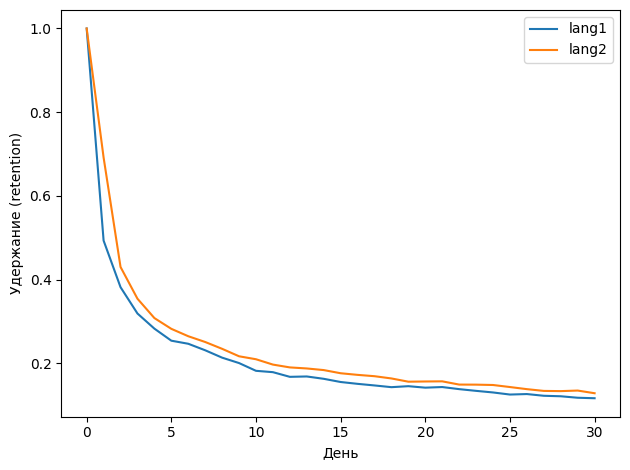

In [91]:
x=df['day_n'].tolist()
y1=df['ret1'].tolist()
y2=df['ret2'].tolist()

plt.plot(x, y1, label='lang1')
plt.plot(x, y2, label='lang2')
plt.xlabel("День")
plt.ylabel("Удержание (retention)")
#plt.title("Retention 30")

plt.tight_layout()

# Добавим легенду
plt.legend ()

plt.show()

In [92]:
#Для ретеншн мы брали максимальную дату из таблицы логинов, а для ltv - максимальную дату из таблицы платежей.
# Т.е. раз мы считаем данные по платежам то и смотрим максимальную дату по платежам, которая у нас есть и от неё минус 180 дней.

print(pays.columns)
pays['pay_date']=pd.to_datetime(pays['pay_dt'])

newDate2 = pays['pay_date'].max() - pd.Timedelta("180 days")
print(pd.to_datetime(newDate2))

Index(['username', 'pay_dt', 'pay_amt', 'currency'], dtype='object')
2022-12-27 00:00:00


In [93]:
profs_c2=profs_clear.copy()
profs_c2=profs_c2.loc[profs_c2['country']=='country2']
profs_c2['register_date']=pd.to_datetime(profs_c2['day_reg'])

profs_c2_180=profs_c2.copy()
profs_c2_180=profs_c2_180.loc[profs_c2_180['register_date']<=pd.to_datetime(newDate2)]

print(profs_c2_180.shape)# (6704, 6)

print(len(set(profs_c2_180['username'].to_list()))) #6704=3403+3301

# уникальные пользователи
lang1_usrs_ltv=len(set(profs_c2_180.loc[profs_c2['lang']=='lang1']['username']))
lang2_usrs_ltv=len(set(profs_c2_180.loc[profs_c2['lang']=='lang2']['username']))
print(lang1_usrs_ltv) #3403
print(lang2_usrs_ltv) #3301

profs_c2_180.info()

(6704, 6)
6704
3403
3301
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6704 entries, 0 to 16998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   username       6704 non-null   object        
 1   day_reg        6704 non-null   object        
 2   lang           6704 non-null   object        
 3   country        6704 non-null   object        
 4   cnt            6704 non-null   int64         
 5   register_date  6704 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 366.6+ KB


In [94]:
pays.loc[pays['currency']=='usd']

,username,pay_dt,pay_amt,currency,pay_date
0,richarddavid,2022-03-27,1.7537,usd,2022-03-27
1,richarddavid,2022-03-27,0.1622,usd,2022-03-27
2,richarddavid,2022-03-26,1.7573,usd,2022-03-26
3,josephromero,2023-06-09,1.6040,usd,2023-06-09
4,josephromero,2023-06-09,1.6040,usd,2023-06-09
...,...,...,...,...,...
19465,bryan27,2023-01-09,5.2588,usd,2023-01-09
19467,alexis55,2023-06-03,16.0758,usd,2023-06-03
19468,kathleenhoffman,2022-07-23,8.4843,usd,2022-07-23
19477,dbowman,2022-10-31,1.3766,usd,2022-10-31


In [95]:
# Шаг 1. Связываем платежи и логины для LTV180
#profs.columns=['username','day_reg','lang','country']]
#profs_clear.columns=['username', 'day_reg', 'lang', 'country', 'cnt']

ltv180=pd.merge(profs_c2_180, pays, on='username', how='left') #(327475, 6)
print(profs_clear.shape)
print(profs_c2_180.shape)
print('--')
print(ltv180.shape)
print('--')
#ltv180['register_date']=pd.to_datetime(ltv180['day_reg'])

#ltv180['currency']=ltv180['currency'].str.upper()
ltv180['day_n']=(ltv180['pay_date']-ltv180['register_date']).dt.days

ltv180_=ltv180.copy()
ltv180_=ltv180_.loc[ltv180_['day_n']<=180]
print(ltv180_.shape)
ltv180_

ltv180.loc[ltv180['currency']=='rub']

(15777, 5)
(6704, 6)
--
(14011, 10)
--
(6363, 11)


,username,day_reg,lang,country,cnt,register_date,pay_dt,pay_amt,currency,pay_date,day_n


In [96]:
print(ltv180_['currency'].unique())

['usd']


In [97]:
# https://pythonist.ru/kak-chitat-excel-fajl-xlsx-v-python/
# Load the xlsx file
excel_data = pd.read_excel('cbr_rates.xlsx')
# Read the values of the file in the dataframe
cbr_rates = pd.DataFrame(excel_data, columns=['date','valute','numcode', 'charcode',  'nominal', 'name', 'value','rate_dt'])
cbr_rates['date_rate']=pd.to_datetime(cbr_rates['rate_dt'])

cbr_rates_USD=cbr_rates.copy()
cbr_rates_USD=cbr_rates_USD.loc[cbr_rates_USD['charcode']=='USD'][['date_rate','charcode','value']]
cbr_rates_USD=cbr_rates_USD.sort_values(by = ['date_rate'])

cbr_rates_USD['charcode']=cbr_rates_USD['charcode'].str.lower()

print(pd.to_datetime(cbr_rates_USD['date_rate'].min()))
print(pd.to_datetime(cbr_rates_USD['date_rate'].max()))
cbr_rates_USD.shape

2022-03-26 00:00:00
2023-06-26 00:00:00


(458, 3)

In [98]:
# https://stackoverflow.com/questions/12137277/how-can-i-make-a-python-numpy-arange-of-datetime
# https://stackoverflow.com/questions/20480897/pandas-add-one-day-to-column
c=np.arange(np.datetime64(cbr_rates_USD['date_rate'].min()),
            np.datetime64(cbr_rates_USD['date_rate'].max()+pd.DateOffset(1)),
            np.timedelta64(1, "D"))
print(c.shape)
cbr_rates_USD_check = (cbr_rates_USD.set_index('date_rate')
        .reindex(c)
        .ffill()
        .reset_index()
)
cbr_rates_USD_check.shape
print(ltv180_.columns)
print(cbr_rates_USD.columns)

(458,)
Index(['username', 'day_reg', 'lang', 'country', 'cnt', 'register_date',
       'pay_dt', 'pay_amt', 'currency', 'pay_date', 'day_n'],
      dtype='object')
Index(['date_rate', 'charcode', 'value'], dtype='object')


In [99]:
ltv180_cbr=pd.merge(ltv180_,
                 cbr_rates_USD,
                 left_on=['currency','pay_date'],
                 right_on=[ 'charcode','date_rate'],
                 how='left')
ltv180_cbr

,username,day_reg,lang,country,cnt,register_date,pay_dt,pay_amt,currency,pay_date,day_n,date_rate,charcode,value
0,richarddavid,2022-03-26,lang1,country2,1,2022-03-26,2022-03-27,1.7537,usd,2022-03-27,1.0,2022-03-27,usd,95.6618
1,richarddavid,2022-03-26,lang1,country2,1,2022-03-26,2022-03-27,0.1622,usd,2022-03-27,1.0,2022-03-27,usd,95.6618
2,richarddavid,2022-03-26,lang1,country2,1,2022-03-26,2022-03-26,1.7573,usd,2022-03-26,0.0,2022-03-26,usd,95.6618
3,erica34,2022-06-11,lang1,country2,1,2022-06-11,2022-08-25,3.1869,usd,2022-08-25,75.0,2022-08-25,usd,59.9974
4,erica34,2022-06-11,lang1,country2,1,2022-06-11,2022-10-22,3.4775,usd,2022-10-22,133.0,2022-10-22,usd,61.1958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6358,belldakota,2022-05-10,lang1,country2,1,2022-05-10,2022-05-11,8.7541,usd,2022-05-11,1.0,2022-05-11,usd,67.3843
6359,belldakota,2022-05-10,lang1,country2,1,2022-05-10,2022-05-11,43.7705,usd,2022-05-11,1.0,2022-05-11,usd,67.3843
6360,belldakota,2022-05-10,lang1,country2,1,2022-05-10,2022-05-11,8.7541,usd,2022-05-11,1.0,2022-05-11,usd,67.3843
6361,jesse55,2022-11-26,lang2,country2,1,2022-11-26,2023-02-08,1.7338,usd,2023-02-08,74.0,2023-02-08,usd,70.8924


In [100]:
ltv180_cbr['summa']=ltv180_cbr['pay_amt']*ltv180_cbr['value']
ltv180_cbr

,username,day_reg,lang,country,cnt,register_date,pay_dt,pay_amt,currency,pay_date,day_n,date_rate,charcode,value,summa
0,richarddavid,2022-03-26,lang1,country2,1,2022-03-26,2022-03-27,1.7537,usd,2022-03-27,1.0,2022-03-27,usd,95.6618,167.762099
1,richarddavid,2022-03-26,lang1,country2,1,2022-03-26,2022-03-27,0.1622,usd,2022-03-27,1.0,2022-03-27,usd,95.6618,15.516344
2,richarddavid,2022-03-26,lang1,country2,1,2022-03-26,2022-03-26,1.7573,usd,2022-03-26,0.0,2022-03-26,usd,95.6618,168.106481
3,erica34,2022-06-11,lang1,country2,1,2022-06-11,2022-08-25,3.1869,usd,2022-08-25,75.0,2022-08-25,usd,59.9974,191.205714
4,erica34,2022-06-11,lang1,country2,1,2022-06-11,2022-10-22,3.4775,usd,2022-10-22,133.0,2022-10-22,usd,61.1958,212.808394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6358,belldakota,2022-05-10,lang1,country2,1,2022-05-10,2022-05-11,8.7541,usd,2022-05-11,1.0,2022-05-11,usd,67.3843,589.888901
6359,belldakota,2022-05-10,lang1,country2,1,2022-05-10,2022-05-11,43.7705,usd,2022-05-11,1.0,2022-05-11,usd,67.3843,2949.444503
6360,belldakota,2022-05-10,lang1,country2,1,2022-05-10,2022-05-11,8.7541,usd,2022-05-11,1.0,2022-05-11,usd,67.3843,589.888901
6361,jesse55,2022-11-26,lang2,country2,1,2022-11-26,2023-02-08,1.7338,usd,2023-02-08,74.0,2023-02-08,usd,70.8924,122.913243


In [101]:
ltv180_cbr['day_n'].describe()

count    6363.00000
mean       61.63885
std        53.51286
min         0.00000
25%        13.00000
50%        48.00000
75%       103.00000
max       180.00000
Name: day_n, dtype: float64

In [102]:
print(ltv180_cbr['summa'].loc[ltv180_cbr['lang']=='lang1'].sum()/1000000) #1.39159049292111(1.392)
print(ltv180_cbr['summa'].loc[ltv180_cbr['lang']=='lang2'].sum()/1000000) #2.56580781906418(2.566)

1.39159049292111
2.56580781906418


In [103]:
sum_ltv180_lang1=ltv180_cbr['summa'].loc[ltv180_cbr['lang']=='lang1'].sum()
sum_ltv180_lang2=ltv180_cbr['summa'].loc[ltv180_cbr['lang']=='lang2'].sum()

mean_ltv180_lang1=sum_ltv180_lang1/lang1_usrs_ltv
mean_ltv180_lang2=sum_ltv180_lang2/lang2_usrs_ltv
print(mean_ltv180_lang1)
print(mean_ltv180_lang2)
koef=mean_ltv180_lang2/mean_ltv180_lang1
print(mean_ltv180_lang2/mean_ltv180_lang1)

408.93050041760506
777.2819809343168
1.9007679303464684


In [104]:
# Шаг 3. Считаем размер группы на каждый день после регистрации

df2=pd.pivot_table(ltv180_cbr,
                index='day_n',
                columns='lang',
                values='summa',
                aggfunc=np.sum).reset_index()
df2.reset_index()
df2["lang1_cum"] = round(df2["lang1"].cumsum()/1000,2)
df2["lang2_cum"] = round(df2["lang2"].cumsum()/1000,2)
df2
df2['diff']=df2["lang2_cum"]/df2["lang1_cum"]
df2

lang,day_n,lang1,lang2,lang1_cum,lang2_cum,diff
0,0.0,110062.574235,178063.325978,110.06,178.06,1.617845
1,1.0,58409.216673,50642.052218,168.47,228.71,1.357571
2,2.0,34851.998026,25688.747905,203.32,254.39,1.251180
3,3.0,29998.321197,53031.472048,233.32,307.43,1.317632
4,4.0,12337.785797,40395.779885,245.66,347.82,1.415859
...,...,...,...,...,...,...
176,176.0,3926.623145,13031.140578,1376.63,2539.39,1.844642
177,177.0,2516.110603,2136.763075,1379.14,2541.52,1.842830
178,178.0,3904.786055,9098.745856,1383.05,2550.62,1.844199
179,179.0,4123.725895,4513.115080,1387.17,2555.13,1.841973


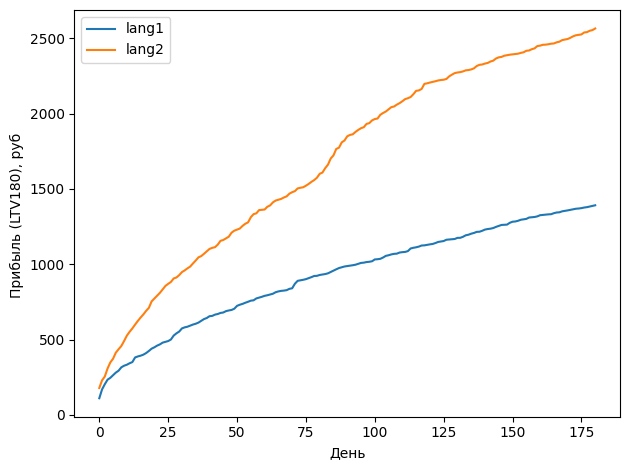

In [105]:
x=df2['day_n'].tolist()
y1=df2['lang1_cum'].tolist()
y2=df2['lang2_cum'].tolist()

plt.plot(x, y1, label='lang1')
plt.plot(x, y2, label='lang2')
plt.xlabel("День")
plt.ylabel("Прибыль (LTV180), руб ")
#plt.title("LTV 180")

plt.tight_layout()

# Добавим легенду
plt.legend ()

plt.show()

In [106]:
ltv180_cbr.loc[ltv180_cbr['username']=='aaronbishop'].shape
ltv180_cbr['pay_amt'].loc[ltv180_cbr['username']=='aaronbishop'].sum()
ltv180_cbr['summa'].loc[ltv180_cbr['username']=='aaronbishop'].sum()
#ltv180_cbr.loc[ltv180_cbr['username']=='aaronbishop']

34738.442869980005

In [107]:
df3=pd.pivot_table(ltv180_cbr,
                index=['lang','username'],
                #columns='lang',
                values='summa',
                aggfunc=np.sum).reset_index()
df3=df3[['lang','summa']]
df3

,lang,summa
0,lang1,34738.442870
1,lang1,262.011896
2,lang1,4897.878183
3,lang1,70.721026
4,lang1,325.520423
...,...,...
1352,lang2,302.028543
1353,lang2,571.739795
1354,lang2,875.208355
1355,lang2,102.569230


<Axes: ylabel='summa'>

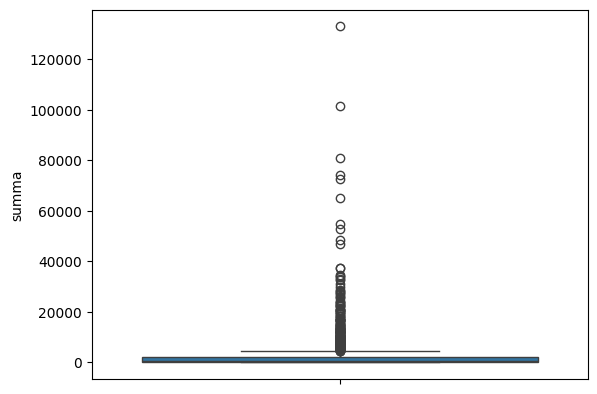

In [108]:
# построить boxplot, проверить выборку на аномалии и очистить
import seaborn as sns
sns.boxplot(data=df3['summa'])

Интерквартильный размах iqr1 =  1785.9111940799999
q1 =  164.07103059999997  q3 =  1949.98222468
---


<Axes: ylabel='summa'>

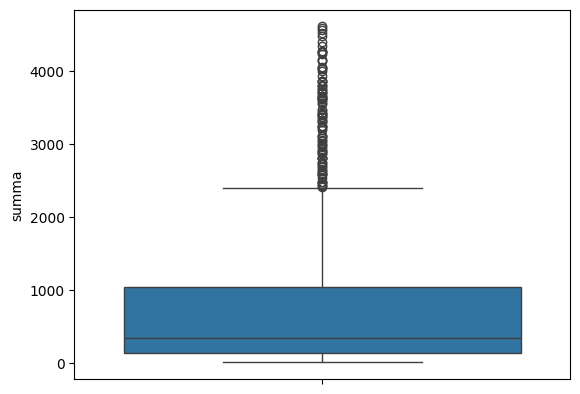

In [109]:
# Выбросы = наблюдения > Q3 + 1,5*IQR или Q1 – 1,5*IQR
q3, q1 = np.percentile(df3['summa'], [75 ,25])
iqr1 = q3 - q1
print('Интерквартильный размах iqr1 = ', iqr1)
print('q1 = ', q1,' q3 = ',q3)
print('---')
b1=(q1-1.5*iqr1)
b2=(q3+1.5*iqr1)

filter_extrem=df3['summa'].between(b1, b2)

data_clear=df3.loc[filter_extrem]

sns.boxplot(data_clear['summa'])

In [110]:
# поделить выборку на группы
filter_lang1=data_clear['lang']=='lang1'
filter_lang2=data_clear['lang']=='lang2'

data_lang1=data_clear.loc[filter_lang1]
data_lang2=data_clear.loc[filter_lang2]

In [111]:
# сравнить среднее и медианное значение уровней;

print('Средний уровень rounds_total в группе data_lang1 = ', data_lang1['summa'].mean())
print('Средний уровень rounds_total в группе data_lang2 = ', data_lang2['summa'].mean())

print('Медиана уровеня rounds_total в группе data_lang1 = ', data_lang1['summa'].median())
print('Медиана уровеня rounds_total в группе data_lang2 = ', data_lang2['summa'].median())

Средний уровень rounds_total в группе data_lang1 =  648.5559914767647
Средний уровень rounds_total в группе data_lang2 =  923.5990481385037
Медиана уровеня rounds_total в группе data_lang1 =  243.795693535
Медиана уровеня rounds_total в группе data_lang2 =  524.4433939600001


In [112]:
res=[]

for i in range(500):
  #ddf  = data_clear.sample(frac = 1, replace = True, random_state=70)
  ddf  = data_clear.sample(frac = 1, replace = True)
  dddf = ddf.groupby('lang')['summa'].mean().reset_index()
  lev=[]
  lev.append(dddf.loc[0][0])
  lev.append(dddf.loc[0][1])
  res.append(lev)
  lev=[]
  lev.append(dddf.loc[1][0])
  lev.append(dddf.loc[1][1])
  res.append(lev)
  lev=[]

df_fm=pd.DataFrame(res)
df_fm.columns=['lang','summa']
df_fm

,lang,summa
0,lang1,659.455926
1,lang2,885.141436
2,lang1,661.525600
3,lang2,949.326001
4,lang1,625.117049
...,...,...
995,lang2,1008.045773
996,lang1,673.610286
997,lang2,955.428020
998,lang1,554.142812


In [113]:
# нарисовать график плотности распределения средних, на котором будут отображены обе группы, их средние и доверительные интервалы;
import scipy.stats as st

# первоначальная выборка
df1=data_lang1['summa']
df2=data_lang2['summa']

ci1=st.t.interval(0.95, len(df1)-1, loc=np.mean(df1), scale=st.sem(df1))
ci2=st.t.interval(0.95, len(df2)-1, loc=np.mean(df2), scale=st.sem(df2))

print('Среднее значение ВЫБОРКИ в группе lang1 = ',np.mean(df1))
print('Среднее значение ВЫБОРКИ в группе lang2 = ',np.mean(df2))


print('Доверительный интервал ВЫБОРКИ в группе lang1 = ',ci1)
print('Доверительный интервал ВЫБОРКИ в группе lang2 = ',ci2)

Среднее значение ВЫБОРКИ в группе lang1 =  648.5559914767647
Среднее значение ВЫБОРКИ в группе lang2 =  923.5990481385037
Доверительный интервал ВЫБОРКИ в группе lang1 =  (575.1646811686368, 721.9473017848926)
Доверительный интервал ВЫБОРКИ в группе lang2 =  (837.2919688748607, 1009.9061274021467)


In [114]:
df_fm_1=df_fm.loc[df_fm['lang']=='lang1']
df_fm_2=df_fm.loc[df_fm['lang']=='lang2']

df_fm_1


,lang,summa
0,lang1,659.455926
2,lang1,661.525600
4,lang1,625.117049
6,lang1,642.773603
8,lang1,634.811332
...,...,...
990,lang1,631.448492
992,lang1,587.312635
994,lang1,636.751532
996,lang1,673.610286


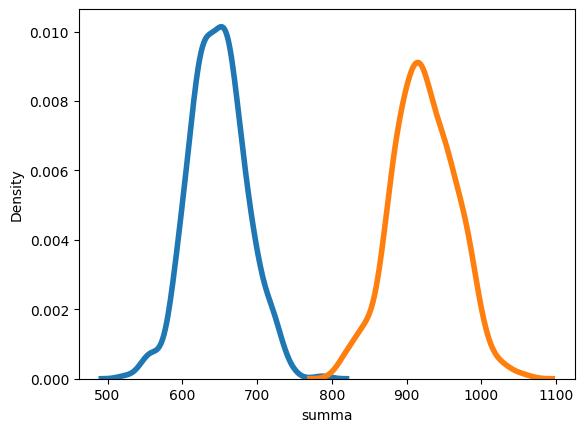

In [115]:
ax=sns.distplot(df_fm_1['summa'], hist=False, kde=True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='lang1')

ax2=sns.distplot(df_fm_2['summa'], hist=False, kde=True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='lang1')

In [116]:
print(np.mean(df1))
print(np.mean(df2))

print(np.mean(df_fm_1))
print(np.mean(df_fm_2))

648.5559914767647
923.5990481385037
summa    647.344056
dtype: float64
summa    923.135316
dtype: float64


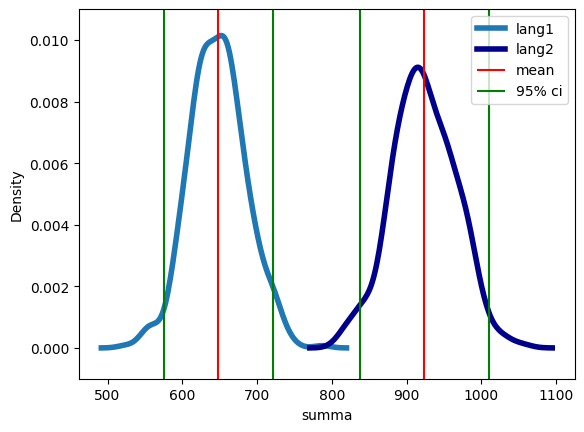

In [117]:
ax=sns.distplot(df_fm_1['summa'], hist=False, kde=True,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='lang1')
ax.vlines(x=np.mean(df_fm_1), ymin=-0.001, ymax=0.011, color='red')
ax.vlines(x=ci1[0], color='green', ymin=-0.001, ymax=0.011)
ax.vlines(x=ci1[1], color='green', ymin=-0.001, ymax=0.011)
ax.set_ylim([-0.001,0.011])
#ax.set_xlim([0.108,0.123])
ax.legend()


ax2=sns.distplot(df_fm_2['summa'], hist=False, kde=True,
             bins=5, color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             label='lang2')
ax2.vlines(x=np.mean(df_fm_2), ymin=-0.001, ymax=0.011, color='red', label='mean' )
ax2.vlines(x=ci2[0], color='green', ymin=-0.001, ymax=0.011, label='95% ci' )
ax2.vlines(x=ci2[1], color='green', ymin=-0.001, ymax=0.011)
ax2.set_ylim([-0.001,0.011])
#ax.set_xlim([0.108,0.123])
ax2.legend()
# ci - confidence interval

In [118]:
print(profs_clear.shape)
print(pays.shape)
print(pays['currency'].unique())
pays['pay_date']=pd.to_datetime(pays['pay_dt'])
pays_cbr=pd.merge(pays,
                 cbr_rates_USD,
                 left_on=['currency','pay_date'],
                 right_on=[ 'charcode','date_rate'],
                 how='left')
print(pays_cbr.shape)

pays_cbr['summa']=0
pays_cbr.loc[pays_cbr['currency']=='usd',['summa']]=pays_cbr['pay_amt']*pays_cbr['value']
pays_cbr.loc[pays_cbr['currency']=='rub',['summa']]=pays_cbr['pay_amt']

pays_cbr.loc[pays_cbr['currency']=='rub']

ltv_all=pd.merge(profs_clear,pays_cbr, on='username')

print('---')
print(ltv_all.loc[(ltv_all['lang']=='lang1')&(ltv_all['country']=='country2')]['summa'].sum()) # 2.2982538858392796
print(ltv_all.loc[(ltv_all['lang']=='lang2')&(ltv_all['country']=='country2')]['summa'].sum()) # 5.06366757579492
print(ltv_all.loc[(ltv_all['lang']=='lang1')&(ltv_all['country']=='country3')]['summa'].sum())

print('---')



(15777, 5)
(19483, 5)
['usd' 'rub']
(19483, 8)
---
2298253.8858392797
5063667.57579492
1839821.5100000002
---


In [119]:
profs_c3=profs_clear.copy()
profs_c3=profs_c3.loc[profs_c3['country']=='country3']
profs_c3['register_date']=pd.to_datetime(profs_c3['day_reg'])
print(profs_c3.shape)

profs_c3_180=profs_c3.copy()
profs_c3_180=profs_c3_180.loc[profs_c3_180['register_date']<=pd.to_datetime(newDate2)]
print(newDate2)
print(profs_c3_180.shape)
print(profs_c3_180['register_date'].min())
print(profs_c3_180['register_date'].max())
print('---')

ltv180_c3=pd.merge(profs_c3_180, pays_cbr, on='username', how='left')
ltv180_c3['day_n']=(ltv180_c3['pay_date']-ltv180_c3['register_date']).dt.days
print(ltv180_c3.shape)

ltv180_c3_=ltv180_c3.copy()
ltv180_c3_=ltv180_c3_.loc[ltv180_c3_['day_n']<=180]
print(ltv180_c3_.shape)
print('---')

ltv180_c3_['pay_amt'].sum()

(4238, 6)
2022-12-27 00:00:00
(2844, 6)
2022-03-25 00:00:00
2022-12-27 00:00:00
---
(5994, 15)
(2682, 15)
---


1075481.45

In [120]:
#sum_c3=ltv180_c3_['pay_amt'].sum()
sum_c3=ltv180_c3_['summa'].sum()

#cnt_c3=profs_c3_180.shape[0]
cnt_c3=len(profs_c3_180['username'].unique())

mean_ltv180_c3=sum_c3/cnt_c3
print(mean_ltv180_c3)
print(koef)
new_mean_ltv180_c3=koef*mean_ltv180_c3
print(new_mean_ltv180_c3)
cnt_new_users=round(2400000/new_mean_ltv180_c3)
print(cnt_new_users)

378.1580344585091
1.9007679303464684
718.7906645015888
3339


In [121]:

import pandas as pd

# Creating a Timestamp object
timestamp = pd.Timestamp('2023-10-04 15:30:00')

# Extracting the year from the Timestamp
year = timestamp.year

# Printing the extracted year
print(year)

# Extracting the month from the Timestamp
month = timestamp.month

# Printing the extracted month
print(month)

# Extracting the day from the Timestamp
day = timestamp.day

# Printing the extracted day
print(day)

2023
10
4


In [122]:
# Extracting the hour from the Timestamp
hour = timestamp.hour

# Printing the extracted hour
print(hour)

# Extracting the minute from the Timestamp
minute = timestamp.minute

# Printing the extracted minute
print(minute)
# Extracting the weekday from the Timestamp
weekday = timestamp.weekday()

# Printing the extracted weekday
print(weekday)

# Extracting the quarter from the Timestamp
quarter = timestamp.quarter

# Printing the extracted quarter
print(quarter)




15
30
2
4


In [123]:
# проверить перекрытие доверительных интервалов и сделать вывоосд о стат.значимти различий;
if ci1[0] in ci2 and ci1[1] in ci2 and ci2[0] in ci1 and ci2[1] in ci1:
  print('Есть прекрытия доверительных интервалов, значит между группами статистически значимых отличий нет.')
else:
  print('Прекрытия доверительных интервалов нет, значит отличия между группами статистически значимы.')

Прекрытия доверительных интервалов нет, значит отличия между группами статистически значимы.
